# stack() and unstack()
### utilizado para reorganizar dataset com multiindex

In [56]:
import pandas as pd

In [57]:
summer = pd.read_csv('../Course_Materials_Part2/Video_Lecture_NBs/summer.csv')

In [58]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [59]:
medals_by_country = summer.groupby(['Country', 'Medal']).Medal.count()

In [60]:
medals_by_country

Country  Medal 
AFG      Bronze     2
AHO      Silver     1
ALG      Bronze     8
         Gold       5
         Silver     2
                   ..
ZIM      Gold      18
         Silver     4
ZZX      Bronze    10
         Gold      23
         Silver    15
Name: Medal, Length: 347, dtype: int64

In [61]:
medals_by_country.loc['USA']

Medal
Bronze    1098
Gold      2235
Silver    1252
Name: Medal, dtype: int64

In [62]:
medals_by_country.loc[("USA", "Gold")]

2235

In [63]:
medals_by_country.shape

(347,)

In [64]:
 medals_by_country.unstack(level=-1, fill_value=0)

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99
...,...,...,...
VIE,0,0,2
YUG,118,143,174
ZAM,1,0,1


In [65]:
medals_by_country =  medals_by_country.unstack(level=-1, fill_value=0)

In [66]:
medals_by_country.head()

Medal,Bronze,Gold,Silver
Country,,,
AFG,2,0,0
AHO,0,0,1
ALG,8,5,2
ANZ,5,20,4
ARG,91,69,99


In [70]:
medals_by_country.shape

(147, 3)

In [71]:
medals_by_country = medals_by_country[['Gold', 'Silver', 'Bronze']]

In [72]:
medals_by_country

Medal,Gold,Silver,Bronze
Country,,,
AFG,0,0,2
AHO,0,1,0
ALG,5,2,8
ANZ,20,4,5
ARG,69,99,91
...,...,...,...
VIE,0,2,0
YUG,143,174,118
ZAM,0,1,1


In [73]:
medals_by_country.sort_values(by=['Gold', 'Silver', 'Bronze'], ascending=[False, False, False], inplace=True)

In [75]:
medals_by_country.head(20)

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
HUN,412,316,351
FRA,408,491,497
SWE,349,367,328
GDR,329,271,225


In [77]:
medals_by_country.loc[['BRA']]

Medal,Gold,Silver,Bronze
Country,,,
BRA,73,173,185


In [78]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

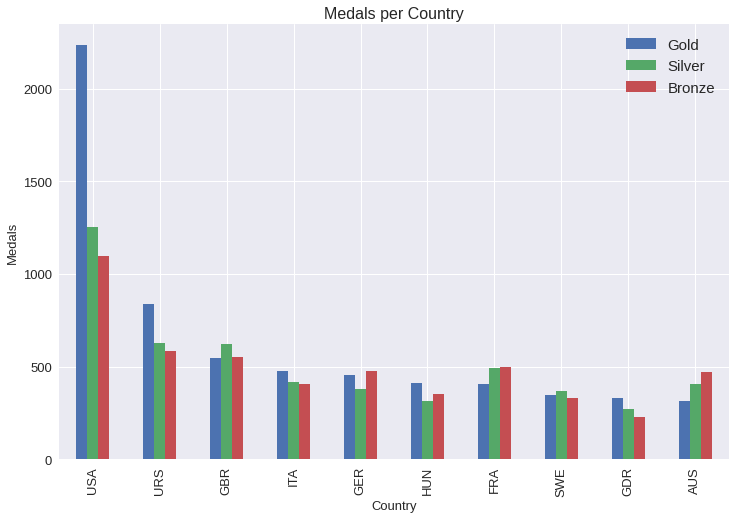

In [79]:
medals_by_country.head(10).plot(kind = 'bar', figsize = (12,8), fontsize=13)
plt.xlabel('Country', fontsize=13)
plt.ylabel('Medals', fontsize=13)
plt.title('Medals per Country', fontsize=16)
plt.legend(fontsize=15)
plt.show()

In [83]:
medals_by_country.stack().unstack()

Medal,Gold,Silver,Bronze
Country,,,
USA,2235,1252,1098
URS,838,627,584
GBR,546,621,553
ITA,476,416,404
GER,452,378,475
...,...,...,...
IRQ,0,0,1
MKD,0,0,1
MRI,0,0,1
